Generic imports

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import time
import math
import random
import pandas as pd
import matplotlib.image as img
import matplotlib as mpl
import numpy as np

Create DF from dataset using images in folder

In [3]:
DATASET_TRAIN_PATH = './DataSet/sample/'

def create_df_from_images(ds_path=DATASET_TRAIN_PATH):
    
    files = os.scandir(ds_path)
    train = pd.DataFrame(columns=['file_name','image','nbfinger','hand'])

    for idx,file in enumerate(files):
        if not file.name.startswith('.') and file.is_file() and file.name.endswith('.png'):
            fname = file.name
            complete_fname = os.path.join(ds_path,fname)
            root,ext = os.path.splitext(fname)
            image = img.imread(complete_fname)
            train.loc[idx,'file_name'] = fname
            train.loc[idx,'image'] = image
            train.loc[idx,'nbfinger'] = root[-2:-1]
            train.loc[idx,'hand'] = root[-1:]
            
    train['nbfinger'] = train['nbfinger'].astype('category')
    train['hand'] = train['hand'].astype('category')
    return train

t1 = time.time()
train = create_df_from_images(DATASET_TRAIN_PATH)
t2 = time.time()
print('dataset created in %.2f seconds' %(t2 - t1))

dataset created in 0.25 seconds


Check repartition of images among categories - should be same for all

In [4]:
train['nbfinger'].value_counts()

4    21
1    18
5    17
2    17
3    14
0    13
Name: nbfinger, dtype: int64

In [5]:
train['hand'].value_counts()

L    52
R    48
Name: hand, dtype: int64

Visualization

Display random image

file_name          0add6a52-954e-4bee-9ba1-5f490d801de3_3L.png
image        [[0.16470589, 0.16862746, 0.17254902, 0.176470...
nbfinger                                                     3
hand                                                         L
Name: 87, dtype: object


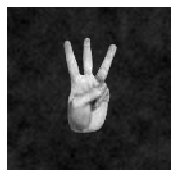

In [85]:
def plot_image(image):
    plt.imshow(image, cmap = mpl.cm.gray);
    plt.axis("off")

randidx = random.randint(0,len(train))
image = train.loc[randidx,'image']
print(train.loc[randidx,:])
plt.figure(figsize=(3,3))
plot_image(image)

Display batch images in a square matrix

<Figure size 720x720 with 0 Axes>

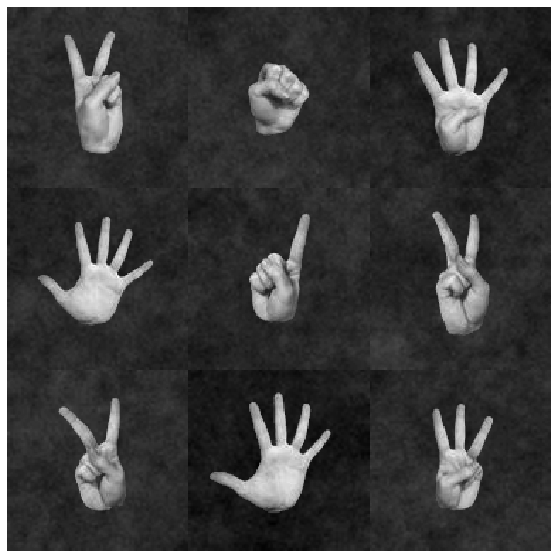

In [65]:
def plot_square_of_images(images):
    
    squaresize = math.ceil(math.sqrt(len(images)))
    im_row = []
    for row in range(squaresize):
        im_col=[]
        for col in range(squaresize):
            if col + squaresize * row < len(images):
                im = images.loc[col + squaresize * row]
            else:
                im = np.zeros((128,128))
            im_col.append(im)
        rowofimages = np.concatenate(im_col,axis=1)
        im_row.append(rowofimages)
    squareofimages = np.concatenate(im_row,axis=0)
    
    return squareofimages
    
images = train.loc[:8,'image']
plt.figure(figsize=(10,10))
plot_images(images)